In this project, conjugate estimators were implemented for the following scenarios: binomial, Gaussian with known variance, and Gaussian with known mean. The mean squared error was plotted for both, the maximum likelihood and conjugate prior estimates using two sets of values for the hyperparameters. For all three scenarios, the mean square error decreases and approaches 0. The maximum likelihood estimates generally had higher mean squared errors than the conjugate prior estimates. The posterior density was also plotted for all three scenarios for different numbers of observations. For all three scenarios, increasing the number of observations caused the distribution to converge to the true mean. In addition, the posterior density was plotted for varying observations in the scenario for a Gaussian distribution with unknown mean and variance. The conjugate prior used was a Normal Inverse-Gamma distribution. As the observations increase, the posterior density tends to the true mean and variance of the data (plotted as a black dot). 

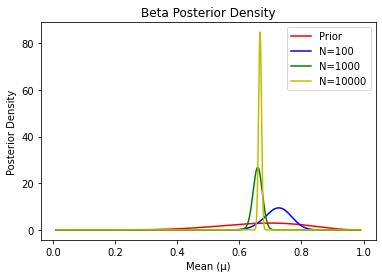

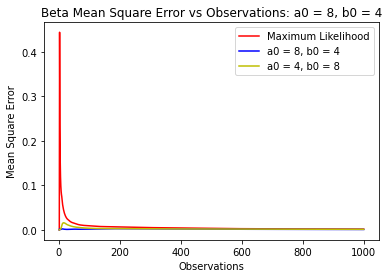

In [ ]:
# Project 1 - Conjugate Priors
# Husam Almanakly and Layth Yassin | ECE474

import numpy as np
import matplotlib.pyplot as plt
from numpy.lib.type_check import iscomplex
from scipy.stats import beta
from scipy.stats import norm
from scipy.stats import gamma
from scipy.stats import invgamma
from IPython.display import display, clear_output
import matplotlib as mpl
#mpl.use('TkAgg')
import matplotlib.animation as animation
import warnings

#warnings.filterwarnings("ignore")

# Binomial Distribution Conjugate Estimator
# Mean Square Error and Maximum Likelihood
def binomialError(a0, b0, data):
    numObs = np.linspace(1, 1000, 1000)
    MSE = np.linspace(0, 999, 1000)
    MSE2 = np.linspace(0, 999, 1000)
    ml = []
    mu = []
    true = a0/(a0+b0)
    # Mean Squared should be: 1/N*∑(µ-t)^2

    #Calculate errors 
    m = 0
    for N in range(1,1000):
        total = 0
        total2 = 0
        if (data[N-1] == 1):
            m+=1
        #Update Equations
        aN = a0 + m
        bN = b0 + (N-m)
        mu.append(aN/(aN+bN))
        ml.append(m/N)

        for i in range(0,N): 
            total += (mu[i] - true)**2
            total2 += (ml[i] - true)**2
        
        MSE[N] = (1/N*total)
        MSE2[N] = (1/N*total2)

    return MSE, MSE2, numObs

#Update Equations and pdf plotting for the Binomial scenario 
def posteriorBinomial(N, color, p):
    data = np.random.binomial(1, p, N)
    m = 0
    for number in data:
        if number == 1:
            m += 1

    #Update Equations
    aN = a0 + m
    bN = b0 + (N-m)

    x = np.linspace(0.01, 0.99, 10000)
    y = beta.pdf(x, aN, bN)
    plt.plot(x,y, color)
    ret = [aN, bN, data]
    return ret

#Animation of pdf for binomial distribution
def movie(): 
    plt.ion()
    fig = plt.figure()
    plt.title('Beta Distribution Animation')
    plt.xlabel('Mean (µ)')
    plt.ylabel('Posterior Density')
    plt.ylim((0, 90)) 
    plt.xlim((0.4,1))
    ax = fig.add_subplot(111)

    x = np.linspace(0.01,0.99,10000)
    line1, = plt.plot(x, beta.pdf(x, a0, b0), 'b-')

    p = 2.0/3.0

    for N in range(0, 5000, 50):
        data = np.random.binomial(1, p, N)
        m = 0
        for number in data:
            if number == 1:
                m += 1

        #Update Equations
        aN = a0 + m
        bN = b0 + (N-m)

        y = beta.pdf(x, aN, bN)
        
        plt.legend(['N = ' + str(N)])
        line1.set_ydata(y)
        line1.set_xdata(x)
        display(fig)
        fig.canvas.draw()
        fig.canvas.flush_events()
        clear_output(wait=True)

# prior beta distribution parameters
a0 = 8
b0 = 4
p = a0/(a0+b0)

fig = plt.figure()
# Add title, legend, axis title etc
x = np.linspace(0.01,0.99,10000)
plt.plot(x, beta.pdf(x, a0, b0), 'r-')
plt.title('Beta Posterior Density')
plt.xlabel('Mean (µ)')
plt.ylabel('Posterior Density')

# updated plot - N trials
posteriorBinomial(100, 'b-', p)

# second update
posteriorBinomial(1000, 'g-', p)

# third update
ret = posteriorBinomial(10000, 'y-', p)

plt.legend(['Prior','N=100','N=1000', 'N=10000'])

data = ret[2]
plt.figure()

#First Error Plot - ML and Conjugate Estimator
MSE, MSE2, numObs = binomialError(8, 4, data)

plt.plot(numObs, MSE2, 'r-')
plt.plot(numObs, MSE, 'b-')

#Second Error Plot - ML and Conjugate Estimator
p = 4.0/12.0
data = np.random.binomial(1, p, 1000)
MSE, MSE2, numObs = binomialError(4, 8, data)
plt.plot(numObs, MSE, 'y-')

plt.title('Beta Mean Square Error vs Observations: a0 = ' + str(a0) + ', b0 = ' + str(b0))
plt.xlabel('Observations')
plt.ylabel('Mean Square Error')
plt.legend(['Maximum Likelihood','a0 = 8, b0 = 4', 'a0 = 4, b0 = 8'])
plt.show()

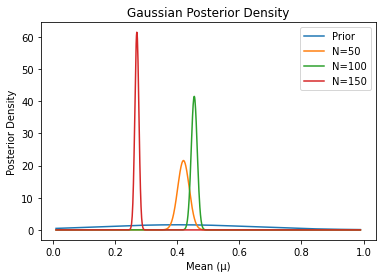

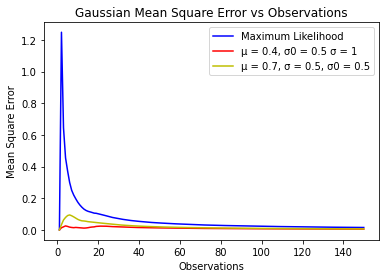

In [ ]:
# Gaussian (with known variance) Conjugate Estimator
# Update Equations and pdf plotting for the Gaussian (with known variance) scenario 
def posteriorGaussian(N, sig, sig0, mu0): # we had color as a param for some reason    
    var = sig**2
    var0 = sig0**2
    
    x = np.linspace(0.01, 0.99, 1000)
    data = np.random.normal(mu0, sig, N)
    
    muML = np.sum(data)/N
    
    #Update Equations
    muN = var/(N*var0 + var)*mu0 + (N*var0)/(N*var0 + var)*muML
    varN = 1/((1/var0) + (N/var))    

    y = norm.pdf(x, muN, varN)

    plt.plot(x, y)

    return data

# Mean Square Error and Maximum Likelihood
def gaussianError(NN, mu0, sig, sig0, data):
    var = sig**2
    var0 = sig0**2
    
    numObs = np.linspace(1, 150, 150)
    MSE = np.linspace(0, 149, 150)
    MSE2 = np.linspace(0, 149, 150)
    ml = []
    mu = []
    # Mean Squared should be: 1/N*∑(µ-t)^2
    true = 1/NN*sum(data)

    m = 0
    for N in range(1,150):
        total = 0
        total2 = 0
        
        tmp = 0
        for k in range(0,N):
            tmp+=data[k]
        muML = tmp/N
        
        #Update Equations
        muN = var/(N*var0 + var)*mu0 + (N*var0)/(N*var0 + var)*muML
        varN = 1/((1/var0) + (N/var))     
        
        mu.append(muN)
        ml.append(muML)

        for i in range(0,N): 
            total += (mu[i] - true)**2
            total2 += (ml[i] - true)**2
        
        MSE[N] = (1/N*total)
        MSE2[N] = (1/N*total2)

    return MSE, MSE2, numObs

#Animation for second pdf of a Gaussian Distribution
def movie2(mu0, sig0, sig): 
    var0 = sig0**2
    var = sig**2

    plt.ion()
    fig = plt.figure()
    plt.title('Gaussian Distribution Animation')
    plt.xlabel('Mean (µ)')
    plt.ylabel('Posterior Density')
    plt.ylim((0, 90)) 
    plt.xlim((0.2,0.6))
    ax = fig.add_subplot(111)

    x = np.linspace(0.01,0.99,10000)
    line1, = plt.plot(x, norm.pdf(x, mu0, sig0), 'b-')

    for N in range(1, 150):
        data = np.random.normal(mu0, sig0, N)
        
        tmp = 0
        for k in range(0,N):
            tmp+=data[k]
        muML = tmp/N

        #Update Equations
        muN = var/(N*var0 + var)*mu0 + (N*var0)/(N*var0 + var)*muML
        varN = 1/((1/var0) + (N/var)) 
        
        y = norm.pdf(x, muN, varN)
        
        plt.legend(['N = ' + str(N)])
        line1.set_ydata(y)
        line1.set_xdata(x)
        display(fig)
        fig.canvas.draw()
        fig.canvas.flush_events()
        clear_output(wait=True)


# Gaussian with known Variance -> find Mean
#Gamma Distribution Parameters
mu0 = 0.4
sig = 1         #this is regular sigma
sig0 = 0.5

x = np.linspace(0.01, 0.99, 1000)
y = norm.pdf(x, mu0, sig0**2)

plt.plot(x,y)
plt.title('Gaussian Posterior Density')
plt.xlabel('Mean (µ)')
plt.ylabel('Posterior Density')

# updated plot - N trials
posteriorGaussian(50,sig,sig0,mu0)

# second update
posteriorGaussian(100,sig,sig0,mu0)

# third update
data = posteriorGaussian(150,sig,sig0,mu0)
plt.legend(['Prior', 'N=50', 'N=100', 'N=150'])

#First Error Plot
MSE, MSE2, numObs = gaussianError(150, mu0, sig, sig0, data)

plt.figure()    
plt.plot(numObs, MSE2, 'b-')
plt.plot(numObs, MSE, 'r-')

#Second Error Plot
mu0 = 0.70
sig0 = 0.50
data = np.random.normal(mu0, sig0, 150)
MSE, MSE2, numObs = gaussianError(150, mu0, sig, sig0, data)
plt.plot(numObs, MSE, 'y-')

plt.title('Gaussian Mean Square Error vs Observations')
plt.xlabel('Observations')
plt.ylabel('Mean Square Error')
plt.legend(['Maximum Likelihood', 'µ = 0.4, σ0 = 0.5 σ = 1', 'µ = 0.7, σ = 0.5, σ0 = 0.5'])

plt.show()

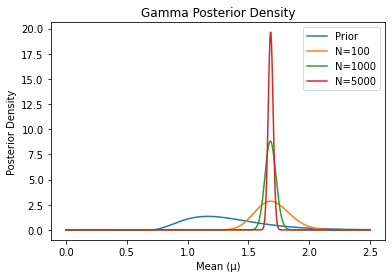

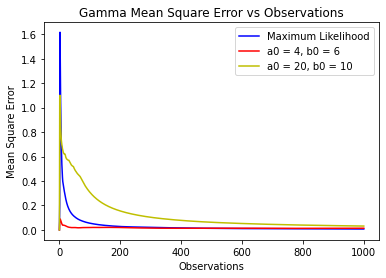

In [ ]:
# Update Equations and pdf plotting for the Gaussian (with known mean) scenario 
def posteriorGamma(N, mu, a0, b0):
    sig0 = 1
    data = np.random.normal(mu, sig0, N)
    x = np.linspace(0, 2.5, 1000)
    total = 0

    aN = a0 + N/2
    for i in data:
        total += (i - mu)**2
    bN = b0 + 1/2 * total

    y = gamma.pdf(x, aN, mu, 1/bN)
    plt.plot(x, y)
    
    return data

#Error plots and Conjugate Estimators 
def gammaError(NN, mu, a0, b0, data):   
    numObs = np.linspace(1, 1000, 1000)
    MSE = np.linspace(0, 999, 1000)
    MSE2 = np.linspace(0, 999, 1000)

    ml = []
    var = []
    temp = 0
    
    for i in range(1, 1000):
        temp += (data[i] - mu)**2
    true = 1/NN * temp
         
    for N in range(1,1000):
        total = 0
        total2 = 0
        
        tmp = 0
        for i in range(0,N):
            tmp += (data[i] - mu)**2
        bN = b0 + (1/2)*tmp
        varML = (bN - b0) * (2/N)

        aN = a0 + N/2
        bN = b0 + 1/2*tmp

        varN = aN/bN

        var.append(varN)
        ml.append(varML)

        for i in range(0,N): 
            total += (var[i] - true)**2
            total2 += (ml[i] - true)**2
        
        MSE[N] = (1/N*total)
        MSE2[N] = (1/N*total2)
    
    return MSE, MSE2, numObs

def movie3(a0, b0, mu, sig): 

    plt.ion()
    fig = plt.figure()
    plt.title('Gamma Distribution Animation')
    plt.xlabel('Mean (µ)')
    plt.ylabel('Posterior Density')
    plt.ylim((0, 40)) 
    plt.xlim((1.5,3.5))
    ax = fig.add_subplot(111)

    x = np.linspace(1.5, 5, 1000)
    line1, = plt.plot(x, gamma.pdf(x, a0, mu, 1/b0), 'b-')

    for N in range(1, 10000, 50):        
        sig0 = 1
        data = np.random.normal(mu, sig0, N)
        x = np.linspace(1.5, 5, 1000)
        
        total = 0
        aN = a0 + N/2
        for i in range(0,N):
           total += (data[i] - mu)**2
        bN = b0 + 1/2 * total

        y = gamma.pdf(x, aN, mu, 1/bN)
        
        plt.legend(['N = ' + str(N)])
        line1.set_ydata(y)
        line1.set_xdata(x)
        display(fig)
        fig.canvas.draw()
        fig.canvas.flush_events()
        clear_output(wait=True)


a0 = 4.0
b0 = 6.0
mu = a0/b0

x = np.linspace(0, 2.5, 1000)
y = gamma.pdf(x, a0, mu, 1/b0)

plt.plot(x,y)

# updated plot - N trials
posteriorGamma(100, mu, a0, b0)
plt.title('Gamma Posterior Density')
plt.xlabel('Mean (µ)')
plt.ylabel('Posterior Density')

# second update
posteriorGamma(1000, mu, a0, b0)

# third update
data = posteriorGamma(5000, mu, a0, b0)
plt.legend(['Prior', 'N=100', 'N=1000', 'N=5000'])

MSE, MSE2, numObs = gammaError(1000, mu, a0, b0, data)

plt.figure()
plt.plot(numObs, MSE2, 'b-')
plt.plot(numObs, MSE, 'r-')

a0 = 20
b0 = 10
mu = a0/b0
data = np.random.normal(mu, 1, 1000)
MSE, MSE2, numObs = gammaError(1000, mu, a0, b0, data)

plt.plot(numObs, MSE, 'y-')

plt.title('Gamma Mean Square Error vs Observations')
plt.xlabel('Observations')


plt.ylabel('Mean Square Error')
plt.legend(['Maximum Likelihood', 'a0 = 4, b0 = 6', 'a0 = 20, b0 = 10'])
plt.show()

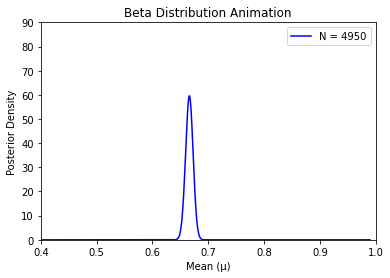

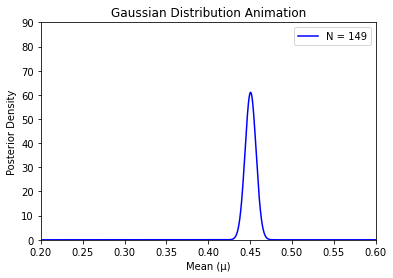

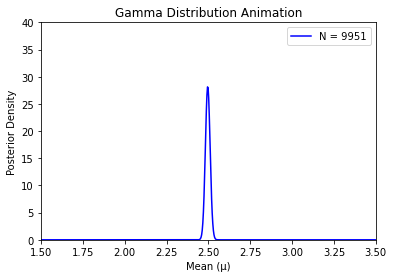

In [ ]:
#This section takes a bit for all the animations to run through. Recommended 
#to run this section on its own separate from the other code
movie()

mu0 = 0.4
sig = 1 # this is regular sigma
sig0 = 0.5
movie2(mu0, sig0, sig)

a0 = 6.0
b0 = 4.0
mu = a0/b0
sig = 1
movie3(a0, b0, mu, sig)

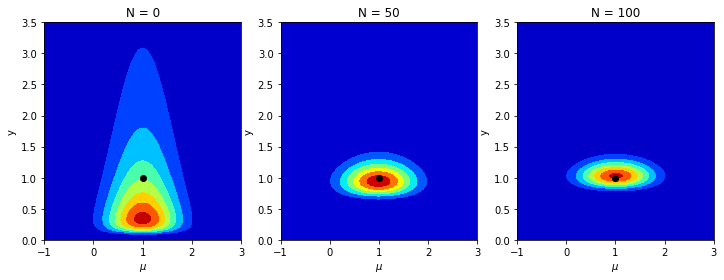

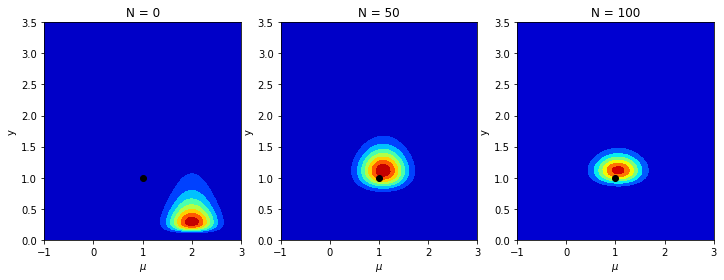

In [ ]:
#Stretch Goal 2 
#Set up subplots
figure, axarr = plt.subplots(nrows = 1, ncols = 3)
figure.set_figheight(4)
figure.set_figwidth(12)

ax = axarr[0]

#First set of initial values
mu0 = 1
v0 = 1
n0 = 2
var0 = 1
var = 0.5

x = np.linspace(-1,3, 100)
y = np.linspace(0, 3.5, 100)

X, Y = np.meshgrid(x, y, indexing = 'ij')


####        Update Equations        #####
mu = 1
sig = 1
data = np.random.normal(mu, sig, 1000)
N = 0 

#Function to calculate and plot Normal Inverse Gamma Distribution
def plotContour(muN, vVarN, vN, nN, N, ax,):
    normalDist = norm.pdf(X, muN, np.sqrt(var/n0))#vVarN/(vN*nN)) 
    gammaDist = invgamma.pdf(Y, a = vN/2, scale = vVarN/2)

    Z = np.zeros(X.shape) 
    Z = normalDist@gammaDist
    ax.set_title('N = ' + str(N))
    ax.set_xlabel('$\mu$')
    ax.set_ylabel('y')
    ax.contourf(X,Y,Z, cmap='jet')
    ax.plot(mu,sig**2, 'o', color = 'black')

#Function to calculate updated variables
def norminvGam(mu0, v0, n0, var0, var, N, ax):
    
    sumX = 0
    for i in range(0,N):
        sumX += data[i]
    xBar = sumX/N

    muN = (n0*mu0 + N*xBar)/(n0 + N)
    nN = n0 + N
    vN = v0 + N

    #total = 0
    total = np.var(data[:N]) * N 
    #for i in range(0,N):
    #    total+=(data[i]-xBar)**2


    vVarN = (v0*var0 + total + (n0*N/(n0 + N))*(mu0 - xBar)**2) # might need to divide by N
    plotContour(muN, vVarN, vN, nN, N, ax)

plotContour(mu0, var0, v0, n0, N, ax)
norminvGam(mu0, v0, n0, var0, var, 50, axarr[1])
norminvGam(mu0, v0, n0, var0, var, 100, axarr[2])
#axarr[1].set_title('Normal Inverse-Gamma Distribution')

#Second set of initial values
mu0 = 2
v0 = 5
n0 = 5
var0 = 2
#var = 1

figure, axarr = plt.subplots(nrows = 1, ncols = 3)
figure.set_figheight(4)
figure.set_figwidth(12)
#axarr[1].set_title('Normal Inverse-Gamma Distribution')

plotContour(mu0, var0, v0, n0, N, axarr[0])
norminvGam(mu0, v0, n0, var0, var, 50, axarr[1])
norminvGam(mu0, v0, n0, var0, var, 100, axarr[2])